In [36]:
import pandas as pd
df=pd.read_csv('climate_data.csv',index_col='DATE'   ,parse_dates=True)
df=df.dropna()
df=df.tail(100000)
df

,DISTRICT,LAT,LON,PRECTOT,PS,QV2M,RH2M,T2M,T2MWET,T2M_MAX,...,T2M_RANGE,TS,WS10M,WS10M_MAX,WS10M_MIN,WS10M_RANGE,WS50M,WS50M_MAX,WS50M_MIN,WS50M_RANGE
DATE,,,,,,,,,,,,,,,,,,,,,
2019-03-15,Solukhumbu,28.0,86.8,0.01,56.21,2.35,60.69,-7.47,-13.06,-2.05,...,10.09,-5.91,5.64,9.78,2.61,7.18,6.56,10.27,3.29,6.98
2019-03-16,Solukhumbu,28.0,86.8,0.00,56.12,1.81,50.98,-8.58,-15.93,-1.26,...,14.60,-7.96,3.99,8.08,1.33,6.75,4.69,8.49,1.72,6.77
2019-03-17,Solukhumbu,28.0,86.8,0.00,56.17,2.16,56.87,-7.71,-13.78,-0.25,...,13.48,-7.58,3.57,7.15,0.70,6.45,3.92,6.94,0.83,6.11
2019-03-18,Solukhumbu,28.0,86.8,0.95,55.92,2.31,63.09,-8.24,-13.25,-2.64,...,9.83,-6.77,4.39,7.97,1.94,6.04,5.02,7.83,2.79,5.03
2019-03-19,Solukhumbu,28.0,86.8,0.67,55.74,2.29,62.84,-8.32,-13.42,-1.06,...,13.39,-7.24,3.83,8.29,1.03,7.26,4.05,8.11,1.13,6.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,Udayapur,26.9,86.5,0.00,95.52,4.72,54.60,11.13,2.17,17.98,...,11.01,9.73,2.38,4.20,1.25,2.94,3.40,4.57,1.37,3.20
2019-12-28,Udayapur,26.9,86.5,0.00,95.73,4.23,50.90,10.56,0.60,18.52,...,13.18,9.07,2.03,2.52,1.07,1.45,3.05,4.51,1.44,3.07
2019-12-29,Udayapur,26.9,86.5,0.00,95.76,4.08,46.09,11.51,0.18,19.34,...,12.30,9.12,2.01,3.01,0.85,2.17,2.97,4.12,0.94,3.18


<Axes: xlabel='DATE'>

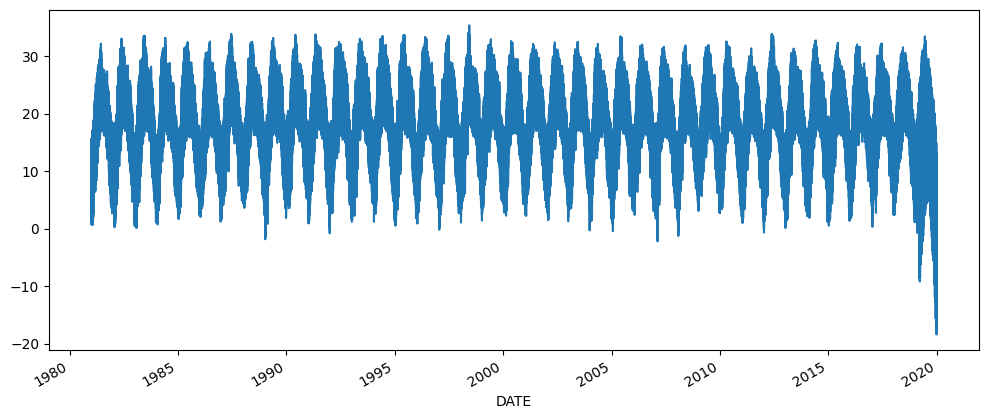

In [37]:
df['T2M'].plot(figsize=(12,5))

In [38]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['T2M'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=235364.131, Time=51.84 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=240578.574, Time=6.33 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=239390.334, Time=3.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=238994.136, Time=6.05 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=240576.582, Time=0.69 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=235490.149, Time=31.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=235377.788, Time=22.34 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=235352.994, Time=27.60 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=235367.138, Time=30.38 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=235355.121, Time=34.75 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=235354.022, Time=41.18 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=234729.394, Time=87.29 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=235391.366, Time=33.23 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=235200.803, Time=116.7

In [39]:
# Assuming 'T2M' is a column within the DataFrame 'df'
df=df['T2M']
df = df.to_frame()
df


,T2M
DATE,
2019-03-15,-7.47
2019-03-16,-8.58
2019-03-17,-7.71
2019-03-18,-8.24
2019-03-19,-8.32
...,...
2019-12-27,11.13
2019-12-28,10.56
2019-12-29,11.51


In [40]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and 'column_name' is the column you want to standardize
column_name = 'T2M'
scaler = StandardScaler()

# Extract the column as a numpy array, then reshape it to a 2D array to fit the scaler
column_data = df[column_name].values.reshape(-1, 1)

# Fit the scaler on the column data and transform it to get standardized values
standardized_data = scaler.fit_transform(column_data)

# Create a new DataFrame with the standardized column
df = pd.DataFrame(standardized_data, columns=[column_name])

# The DataFrame 'df_standardized' will now have the standardized column 'T2M'


In [41]:
print(df.shape)
train=df.iloc[:-30000]
test=df.iloc[-30000:]
print(train.shape,test.shape)

(100000, 1)
(70000, 1) (30000, 1)


In [42]:
import statsmodels.api as sm

# Assuming 'train' is the DataFrame containing the time series data in the 'T2M' column
model = sm.tsa.ARIMA(train['T2M'], order=(2, 1, 3))
results = model.fit()
print(results.summary())


/home/anish/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                    T2M   No. Observations:                70000
Model:                 ARIMA(2, 1, 3)   Log Likelihood               50667.138
Date:                Tue, 25 Jul 2023   AIC                        -101322.276
Time:                        11:23:01   BIC                        -101267.338
Sample:                             0   HQIC                       -101305.332
                              - 70000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.6286      0.007    241.661      0.000       1.615       1.642
ar.L2         -0.6567      0.006   -111.738      0.000      -0.668      -0.645
ma.L1         -1.5421      0.007   -225.865      0.0

/home/anish/venv/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/anish/venv/lib/python3.10/site-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['typ']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


<Axes: >

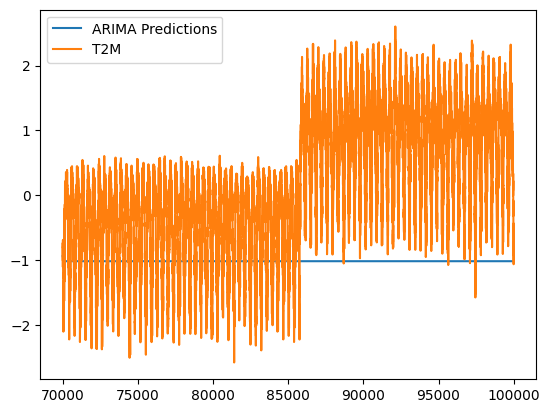

In [43]:
import statsmodels.api as sm

# Assuming 'train' is the DataFrame containing the time series data in the 'T2M' column
model = sm.tsa.ARIMA(train['T2M'], order=(2, 1, 3))
results = model.fit()

# Now that the model is fitted, you can make predictions using the estimated parameters
start = len(train)
end = len(train) + len(test) - 1
pred = results.predict(start=start, end=end, typ='levels').rename('ARIMA Predictions')

# Plotting the predictions and the actual test data
pred.plot(legend=True)
test['T2M'].plot(legend=True)


In [44]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

# Assuming 'test' is the DataFrame containing the actual test data
# Assuming 'pred' is the pandas Series containing the ARIMA predictions

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(test['T2M'], pred)
print("MAE:", mae)

# Calculate Root Mean Squared Error (RMSE)
rmse = sqrt(mean_squared_error(test['T2M'], pred))
print("RMSE:", rmse)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(test['T2M'], pred)
print("MSE:", mse)


MAE: 1.2809172363797914
RMSE: 1.528991476733245
MSE: 2.3378149359229097
